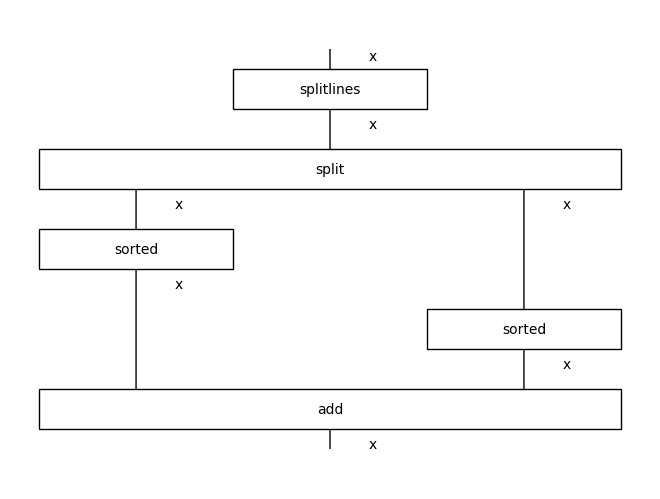

In [1]:
from discopy.frobenius import *
from discopy import python
example = """3   4
4   3
2   5
1   3
3   9
3   3"""
x = Ty('x')
splitlines = Box('splitlines', x, x)
_sorted = Box('sorted', x, x)
split = Box('split', x, x @ x)
add = Box('add', x @ x, x)
F = Functor(
    lambda ob: ob,
    {
        splitlines: lambda a: (a.splitlines(), ),
        split: lambda a: (
            tuple(int(x.split()[0]) for x in a),
            (tuple(int(x.split()[1]) for x in a), )),
        _sorted: lambda a: (sorted(a), ),
        add: lambda a, b: sum(
            abs(x-y) for x, y in zip(a, b)),
    },
    cod=Category(python.Ty, python.Function))
f = splitlines >> split >> (_sorted @ _sorted) >> add
f.draw()
ff = F(f)
assert ff(example) == 11